## Setup

In [1]:
import os

path = "/home/orion23/Desktop/Electrical-Behaviour-Prediction/FINFET/7nm/NOT/Data/sim0"
os.chdir(path)
print("Current path:", os.getcwd())
print("Files:")
for file in os.listdir():
  print(" ", file)

Current path: /home/orion23/Desktop/Electrical-Behaviour-Prediction/FINFET/7nm/NOT/Data/sim0
Files:
  var.sp
  inverter.sp
  all_results.csv
  params.json


## Exploração de dados

### Leitura dos dados
Carrega os dados em um DataFrame pandas com as variáveis de entrada como índices.

In [3]:
import pandas as pd
import numpy as np

file = "all_results.csv"

data_list = []

data_list.append(pd.read_csv(file, index_col=0))
data_list[-1]["nfetL"] = 2.1e-8
data_list[-1]["pfetL"] = 2.1e-8
data_list[-1]["nfetH"] = 3.2e-8
data_list[-1]["pfetH"] = 3.2e-8

data = pd.concat(data_list, ignore_index=True)
#data["load"] = data["load"].map(lambda x: float(x[:-1])*10**(-15))
data.describe()

nmos_rvt:@:nfet_phig:@:IGNC  pmos_rvt:@:pfet_phig:@:IGNC           vdd  \
count                 12000.000000                 12000.000000  12000.000000   
mean                     -0.152146                     0.249727      0.750000   
std                       0.893416                     0.979864      0.111808   
min                      -2.450200                    -1.575700      0.600000   
25%                      -0.676400                    -0.613300      0.675000   
50%                      -0.260900                     0.360700      0.750000   
75%                       0.613100                     0.836200      0.825000   
max                       1.675700                     2.774200      0.900000   

         number_fin  t_fall_delay  t_rise_delay   t_fall_time   t_rise_time  \
count  12000.000000  1.200000e+04  1.200000e+04  1.200000e+04  1.200000e+04   
mean       3.000000  1.277912e-11  1.521285e-11  1.546200e-11  1.972427e-11   
std        1.414272  1.431344e-12  1.944705e-12  1.477180e-12  2.395826e-12   
min        1.000000  9.916680e-12  1.067093e-11  1.167216e-11  1.511011e-11   
25%        2.000000  1.174120e-11  1.387091e-11  1.432871e-11  1.782357e-11   
50%        3.000000  1.243964e-11  1.498730e-11  1.524634e-11  1.943475e-11   
75%        4.000000  1.393163e-11  1.646051e-11  1.658662e-11  2.124676e-11   
max        5.000000  1.678825e-11  1.995723e-11  1.954263e-11  2.628360e-11   

             temper         nfetL         pfetL         nfetH         pfetH  
count  12000.000000  1.200000e+04  1.200000e+04  1.200000e+04  1.200000e+04  
mean      37.500000  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
std       42.697407  3.308860e-24  3.308860e-24  6.617721e-24  6.617721e-24  
min      -25.000000  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
25%        0.000000  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
50%       37.500000  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
75%       75.000000  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
max      100.000000  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08

In [5]:
data.tail()

nmos_rvt:@:nfet_phig:@:IGNC  pmos_rvt:@:pfet_phig:@:IGNC LoadCap  vdd  \
11995                      -0.5351                       1.5320      4f  0.9   
11996                      -0.6454                       1.4374      4f  0.9   
11997                       0.1960                      -0.4051      4f  0.9   
11998                       0.9222                      -0.2628      4f  0.9   
11999                       1.0165                      -0.6328      4f  0.9   

       number_fin  t_fall_delay  t_rise_delay   t_fall_time   t_rise_time  \
11995           5  1.163544e-11  1.173624e-11  1.385737e-11  1.640417e-11   
11996           5  1.151062e-11  1.189797e-11  1.371905e-11  1.636808e-11   
11997           5  1.302208e-11  1.566121e-11  1.479087e-11  1.915464e-11   
11998           5  1.413867e-11  1.467380e-11  1.609636e-11  1.871045e-11   
11999           5  1.368930e-11  1.548242e-11  1.606590e-11  1.970987e-11   

       temper         nfetL         pfetL         nfetH         pfetH  
11995   -25.0  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
11996   -25.0  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
11997   -25.0  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
11998   -25.0  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08  
11999   -25.0  2.100000e-08  2.100000e-08  3.200000e-08  3.200000e-08

In [4]:
inp_var = ["load", "Vin", "pmosW", "nmosW", "temper", "nmosL", "pmosL"]
unique = {}
for col in inp_var:
  unique[col] = list(np.sort(data[col].unique()))
unique

{'Vin': [0.6, 0.7, 0.8, 0.9],
 'load': [1e-15, 4e-15, 8e-15, 1.6e-14],
 'nmosL': [3.2e-08, 4e-08],
 'nmosW': [7e-08, 1.4e-07, 2.1e-07, 2.8e-07, 3.4e-07, 4.2e-07],
 'pmosL': [3.2e-08, 4e-08],
 'pmosW': [7e-08, 1.4e-07, 2.1e-07],
 'temper': [-25.0, 0.0, 25.0, 50.0, 75.0, 100.0]}

In [5]:
tmp = data[inp_var]
# Verifica quantas vezes o mesmo caso é repetido
n_repetitions = tmp.shape[0]
for i in range(1, tmp.shape[0]):
  if (not tmp.iloc[0].equals(tmp.iloc[i])):
    n_repetitions = i
    break

n_cases = tmp.shape[0]//n_repetitions
idx = []
idx.append(np.vstack([np.arange(n_cases)]*n_repetitions).T.reshape(-1))
idx.append(np.concatenate([np.arange(n_repetitions)]*n_cases))
data.index = pd.MultiIndex.from_tuples(list(zip(*idx)), names=["case", "idx"])
data

nmos:@:var:@:IGNC  pmos:@:varp:@:IGNC          load  Vin  \
case idx                                                             
0    0               0.0000              0.0000  1.000000e-15  0.6   
     1              -0.8014             -0.8294  1.000000e-15  0.6   
     2              -0.2677              0.2150  1.000000e-15  0.6   
     3               1.6757              0.8946  1.000000e-15  0.6   
     4               0.2014              1.0447  1.000000e-15  0.6   
...                     ...                 ...           ...  ...   
3455 995             0.6558              1.7402  1.600000e-14  0.9   
     996            -1.7567              1.0487  1.600000e-14  0.9   
     997            -0.2311             -0.9824  1.600000e-14  0.9   
     998            -1.5606             -1.2004  1.600000e-14  0.9   
     999             1.2675              1.1071  1.600000e-14  0.9   

                 pmosW         nmosW         tplha         tphla  \
case idx                                                           
0    0    7.000000e-08  7.000000e-08  5.296328e-11  4.108344e-11   
     1    7.000000e-08  7.000000e-08  4.781634e-11  3.749950e-11   
     2    7.000000e-08  7.000000e-08  5.401571e-11  3.978313e-11   
     3    7.000000e-08  7.000000e-08  5.781231e-11  5.344589e-11   
     4    7.000000e-08  7.000000e-08  5.862738e-11  4.210038e-11   
...                ...           ...           ...           ...   
3455 995  2.100000e-07  4.200000e-07  1.686401e-10  4.141877e-11   
     996  2.100000e-07  4.200000e-07  1.626103e-10  3.707298e-11   
     997  2.100000e-07  4.200000e-07  1.459971e-10  3.964108e-11   
     998  2.100000e-07  4.200000e-07  1.445887e-10  3.737593e-11   
     999  2.100000e-07  4.200000e-07  1.629498e-10  4.403446e-11   

                 tplhb         tphlb          iint  temper         nmosL  \
case idx                                                                   
0    0    5.576746e-11  4.300907e-11 -1.678481e-15    25.0  3.200000e-08   
     1    5.200318e-11  3.914798e-11 -1.715082e-15    25.0  3.200000e-08   
     2    5.695795e-11  4.167460e-11 -1.675667e-15    25.0  3.200000e-08   
     3    6.073036e-11  5.639755e-11 -1.640278e-15    25.0  3.200000e-08   
     4    6.190934e-11  4.425825e-11 -1.652022e-15    25.0  3.200000e-08   
...                ...           ...           ...     ...           ...   
3455 995  1.775817e-10  4.265868e-11 -3.156784e-14     0.0  4.000000e-08   
     996  1.715816e-10  3.853073e-11 -3.160250e-14     0.0  4.000000e-08   
     997  1.559593e-10  4.080671e-11 -3.159014e-14     0.0  4.000000e-08   
     998  1.527203e-10  3.887191e-11 -3.159442e-14     0.0  4.000000e-08   
     999  1.712463e-10  4.407126e-11 -3.156601e-14     0.0  4.000000e-08   

                 pmosL  
case idx                
0    0    3.200000e-08  
     1    3.200000e-08  
     2    3.200000e-08  
     3    3.200000e-08  
     4    3.200000e-08  
...                ...  
3455 995  4.000000e-08  
     996  4.000000e-08  
     997  4.000000e-08  
     998  4.000000e-08  
     999  4.000000e-08  

[3456000 rows x 14 columns]

In [6]:
data[data.columns[0]]
def gauss(nom, rvar, sig, data):
  return (nom + (nom*rvar)/sig * data)
gauss(0.5088, 0.1, 3, data[data.columns[0]]).describe()

count    3.456000e+06
mean     5.089018e-01
std      1.677063e-02
min      4.508188e-01
25%      4.973982e-01
50%      5.081090e-01
75%      5.200309e-01
max      5.576007e-01
Name: nmos:@:var:@:IGNC, dtype: float64

In [7]:
data[data.columns[1]]
def gauss(nom, rvar, sig, data):
  return (nom + (nom*rvar)/sig * data)
gauss(-0.450, 0.1, 3, data[data.columns[1]]).describe()

count    3.456000e+06
mean    -4.505836e-01
std      1.507466e-02
min     -4.990755e-01
25%     -4.603759e-01
50%     -4.514270e-01
75%     -4.405628e-01
max     -3.971025e-01
Name: pmos:@:varp:@:IGNC, dtype: float64

###Remoção de Outliers

In [8]:
from scipy.stats import zscore
out_var = ["tphla", "tphlb", "tplha", "tplhb", "iint"]
filtered_list = []
for case in data.index.unique(level="case"):
    tmp = data.loc[slice(case, case), :]
    not_outlier = (np.abs(zscore(tmp[out_var])) < 3).all(axis=1)
    filtered_list.append(tmp[not_outlier])
filtered = pd.concat(filtered_list)
filtered

nmos:@:var:@:IGNC  pmos:@:varp:@:IGNC          load  Vin  \
case idx                                                             
0    0               0.0000              0.0000  1.000000e-15  0.6   
     1              -0.8014             -0.8294  1.000000e-15  0.6   
     2              -0.2677              0.2150  1.000000e-15  0.6   
     3               1.6757              0.8946  1.000000e-15  0.6   
     4               0.2014              1.0447  1.000000e-15  0.6   
...                     ...                 ...           ...  ...   
3455 995             0.6558              1.7402  1.600000e-14  0.9   
     996            -1.7567              1.0487  1.600000e-14  0.9   
     997            -0.2311             -0.9824  1.600000e-14  0.9   
     998            -1.5606             -1.2004  1.600000e-14  0.9   
     999             1.2675              1.1071  1.600000e-14  0.9   

                 pmosW         nmosW         tplha         tphla  \
case idx                                                           
0    0    7.000000e-08  7.000000e-08  5.296328e-11  4.108344e-11   
     1    7.000000e-08  7.000000e-08  4.781634e-11  3.749950e-11   
     2    7.000000e-08  7.000000e-08  5.401571e-11  3.978313e-11   
     3    7.000000e-08  7.000000e-08  5.781231e-11  5.344589e-11   
     4    7.000000e-08  7.000000e-08  5.862738e-11  4.210038e-11   
...                ...           ...           ...           ...   
3455 995  2.100000e-07  4.200000e-07  1.686401e-10  4.141877e-11   
     996  2.100000e-07  4.200000e-07  1.626103e-10  3.707298e-11   
     997  2.100000e-07  4.200000e-07  1.459971e-10  3.964108e-11   
     998  2.100000e-07  4.200000e-07  1.445887e-10  3.737593e-11   
     999  2.100000e-07  4.200000e-07  1.629498e-10  4.403446e-11   

                 tplhb         tphlb          iint  temper         nmosL  \
case idx                                                                   
0    0    5.576746e-11  4.300907e-11 -1.678481e-15    25.0  3.200000e-08   
     1    5.200318e-11  3.914798e-11 -1.715082e-15    25.0  3.200000e-08   
     2    5.695795e-11  4.167460e-11 -1.675667e-15    25.0  3.200000e-08   
     3    6.073036e-11  5.639755e-11 -1.640278e-15    25.0  3.200000e-08   
     4    6.190934e-11  4.425825e-11 -1.652022e-15    25.0  3.200000e-08   
...                ...           ...           ...     ...           ...   
3455 995  1.775817e-10  4.265868e-11 -3.156784e-14     0.0  4.000000e-08   
     996  1.715816e-10  3.853073e-11 -3.160250e-14     0.0  4.000000e-08   
     997  1.559593e-10  4.080671e-11 -3.159014e-14     0.0  4.000000e-08   
     998  1.527203e-10  3.887191e-11 -3.159442e-14     0.0  4.000000e-08   
     999  1.712463e-10  4.407126e-11 -3.156601e-14     0.0  4.000000e-08   

                 pmosL  
case idx                
0    0    3.200000e-08  
     1    3.200000e-08  
     2    3.200000e-08  
     3    3.200000e-08  
     4    3.200000e-08  
...                ...  
3455 995  4.000000e-08  
     996  4.000000e-08  
     997  4.000000e-08  
     998  4.000000e-08  
     999  4.000000e-08  

[3371061 rows x 14 columns]

###Histograma de cada caso (Simulação de Monte Carlo)

&ensp; Gráficos da distribuição de frequência de cada variável de saída em cada caso conjunto de amostras onde as variáveis de entrada tem o mesmo valor)

&ensp; Está sendo utilizado o teste de Shapiro para plotar apenas os 10% casos menos parecidos com a distribuição normal.

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import shapiro

def plot_hist(dt, col, inp, figunit=(2, 2), print_worst=0.1):
  index = dt.index.levels[0]
  shapiro_results = []
  gaussian = 0
  for idx in index:
    test = shapiro(dt[col].loc[idx])[1]
    shapiro_results.append((idx, test))
    gaussian += test > 0.05
  print("%i of %i gaussian samples" %(gaussian, len(index)))
  shapiro_results.sort(key=(lambda x: x[1])) #, reverse=True)

  qnt = int(index.shape[0]*print_worst)
  n_col = int(np.ceil(np.sqrt(qnt)/1.7))
  n_rows = int(np.ceil(qnt/n_col))
  fig, axs = plt.subplots(n_rows, n_col, sharey=True,
                          figsize=(figunit[0]*n_col, figunit[1]*n_rows))
  
  fig.suptitle('Todos os casos (%s)' %(col), fontsize=16)

  fig.tight_layout()
  fig.subplots_adjust(wspace=0)#, top=0.95)

  for i in range(n_rows):
    for j in range(i*n_col, min(qnt, (i+1)*n_col)):
      idx = shapiro_results[j][0]
      dt[col].loc[idx].hist(bins=20, ax=axs[i][j-i*n_col], alpha=0.6)

  for i in range(n_rows):
    ylim = axs[i][0].get_ylim()
    ybottom = ylim[0]+np.mean(ylim)*0.01
    ytop    = ylim[1]-np.mean(ylim)*0.01

    for j in range(i*n_col, min(qnt, (i+1)*n_col)):
      ax = axs[i][j-i*n_col]
      xlim = ax.get_xlim()
      xbottom = xlim[0]+np.mean(xlim)*0.01
      xtop    = xlim[1]-np.mean(xlim)*0.01

      idx = shapiro_results[j][0]
      txt = "shapiro = %.2e\n" %shapiro_results[j][1]
      txt += "\n".join(["%s = %.2e" %(var, dt[var].loc[idx].iloc[0]) for var in inp])

      ax.text(xbottom, ytop, txt, size="small", alpha=0.8, va="top")
      ax.text(xtop, ybottom, "%i" %(idx), ha="right")

####TPHLA

7 of 3456 gaussian samples


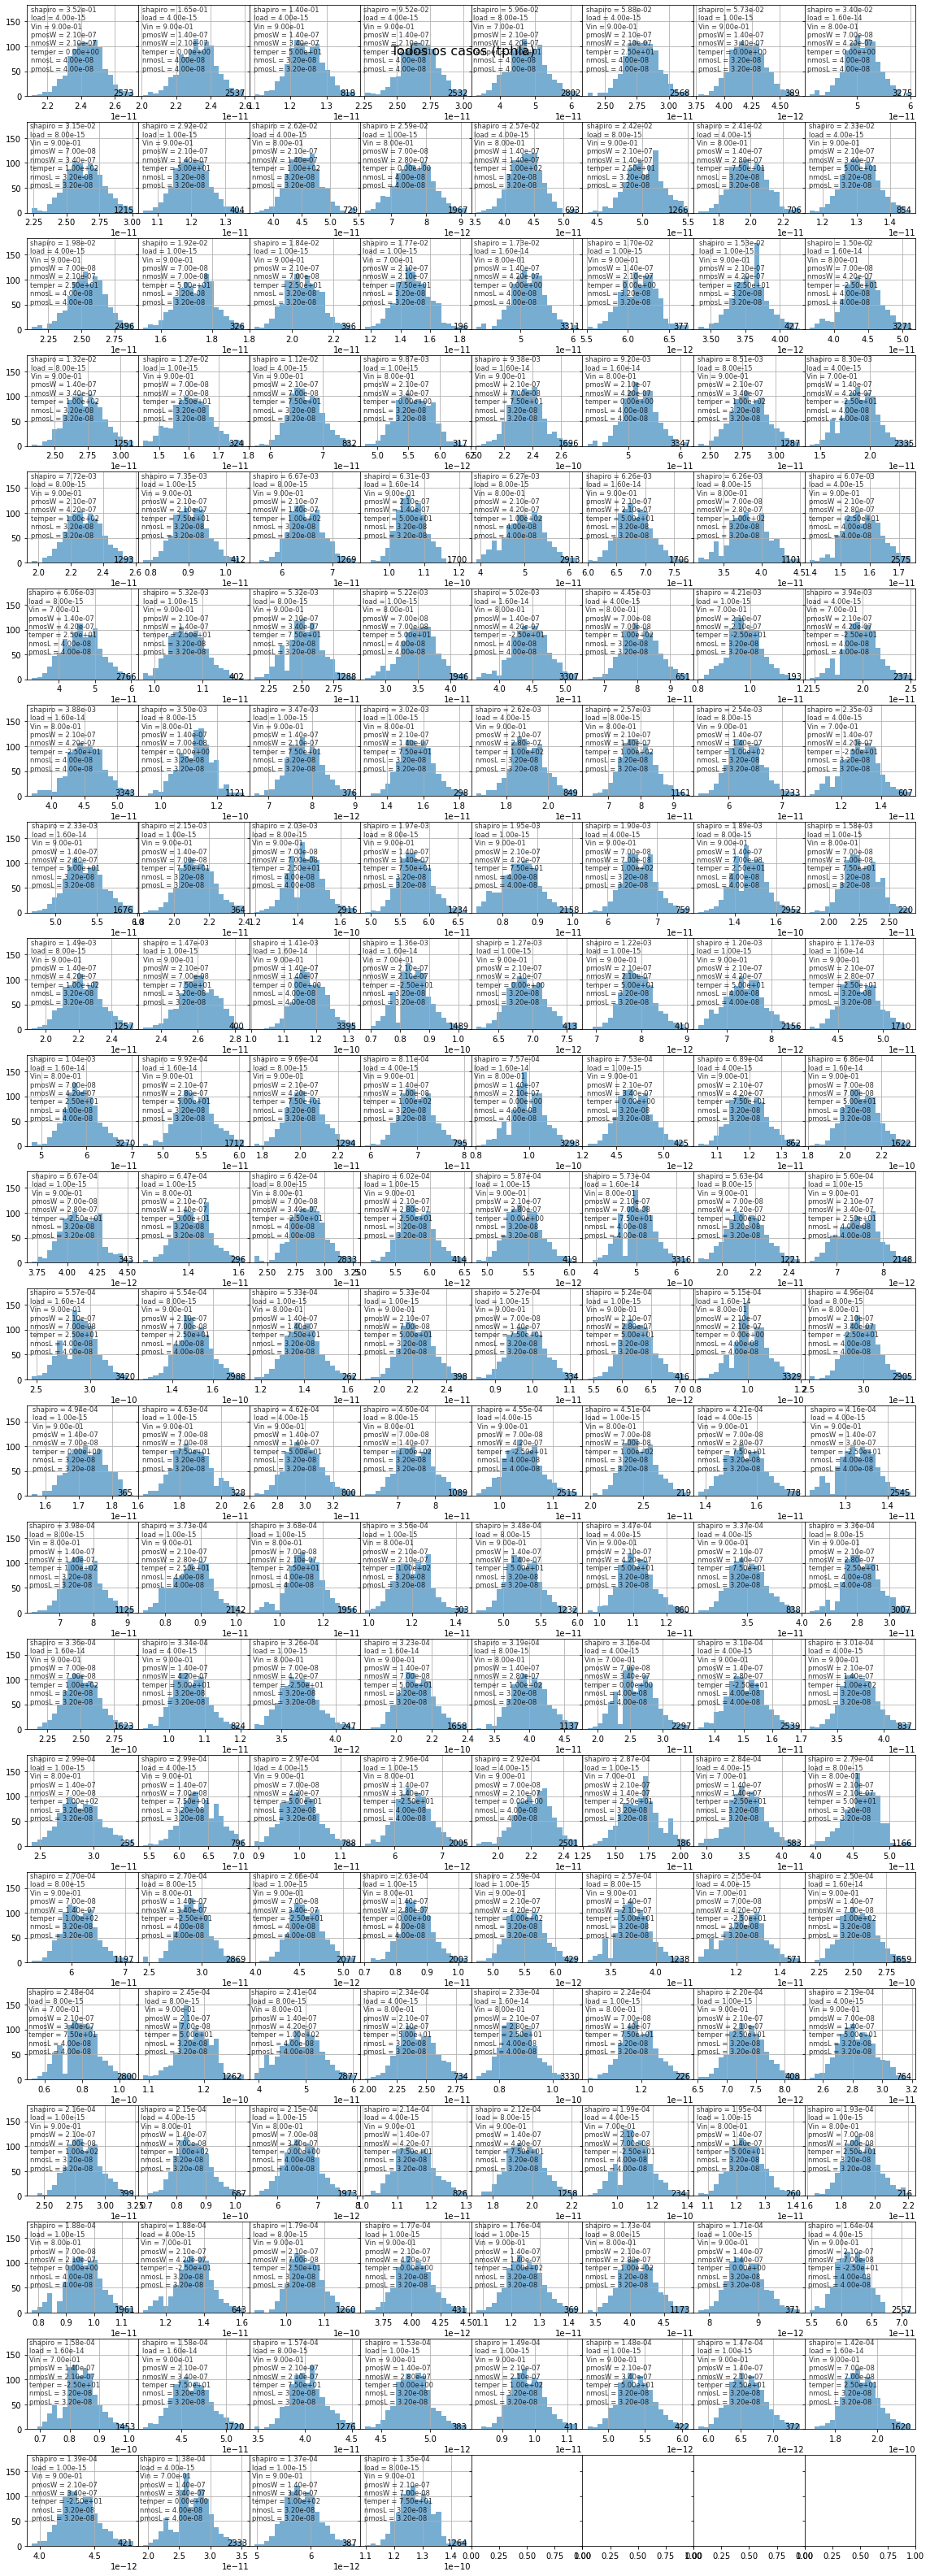

In [19]:
plot_hist(filtered, "tphla", inp_var, print_worst=0.05)

####TPHLB

8 of 3456 gaussian samples


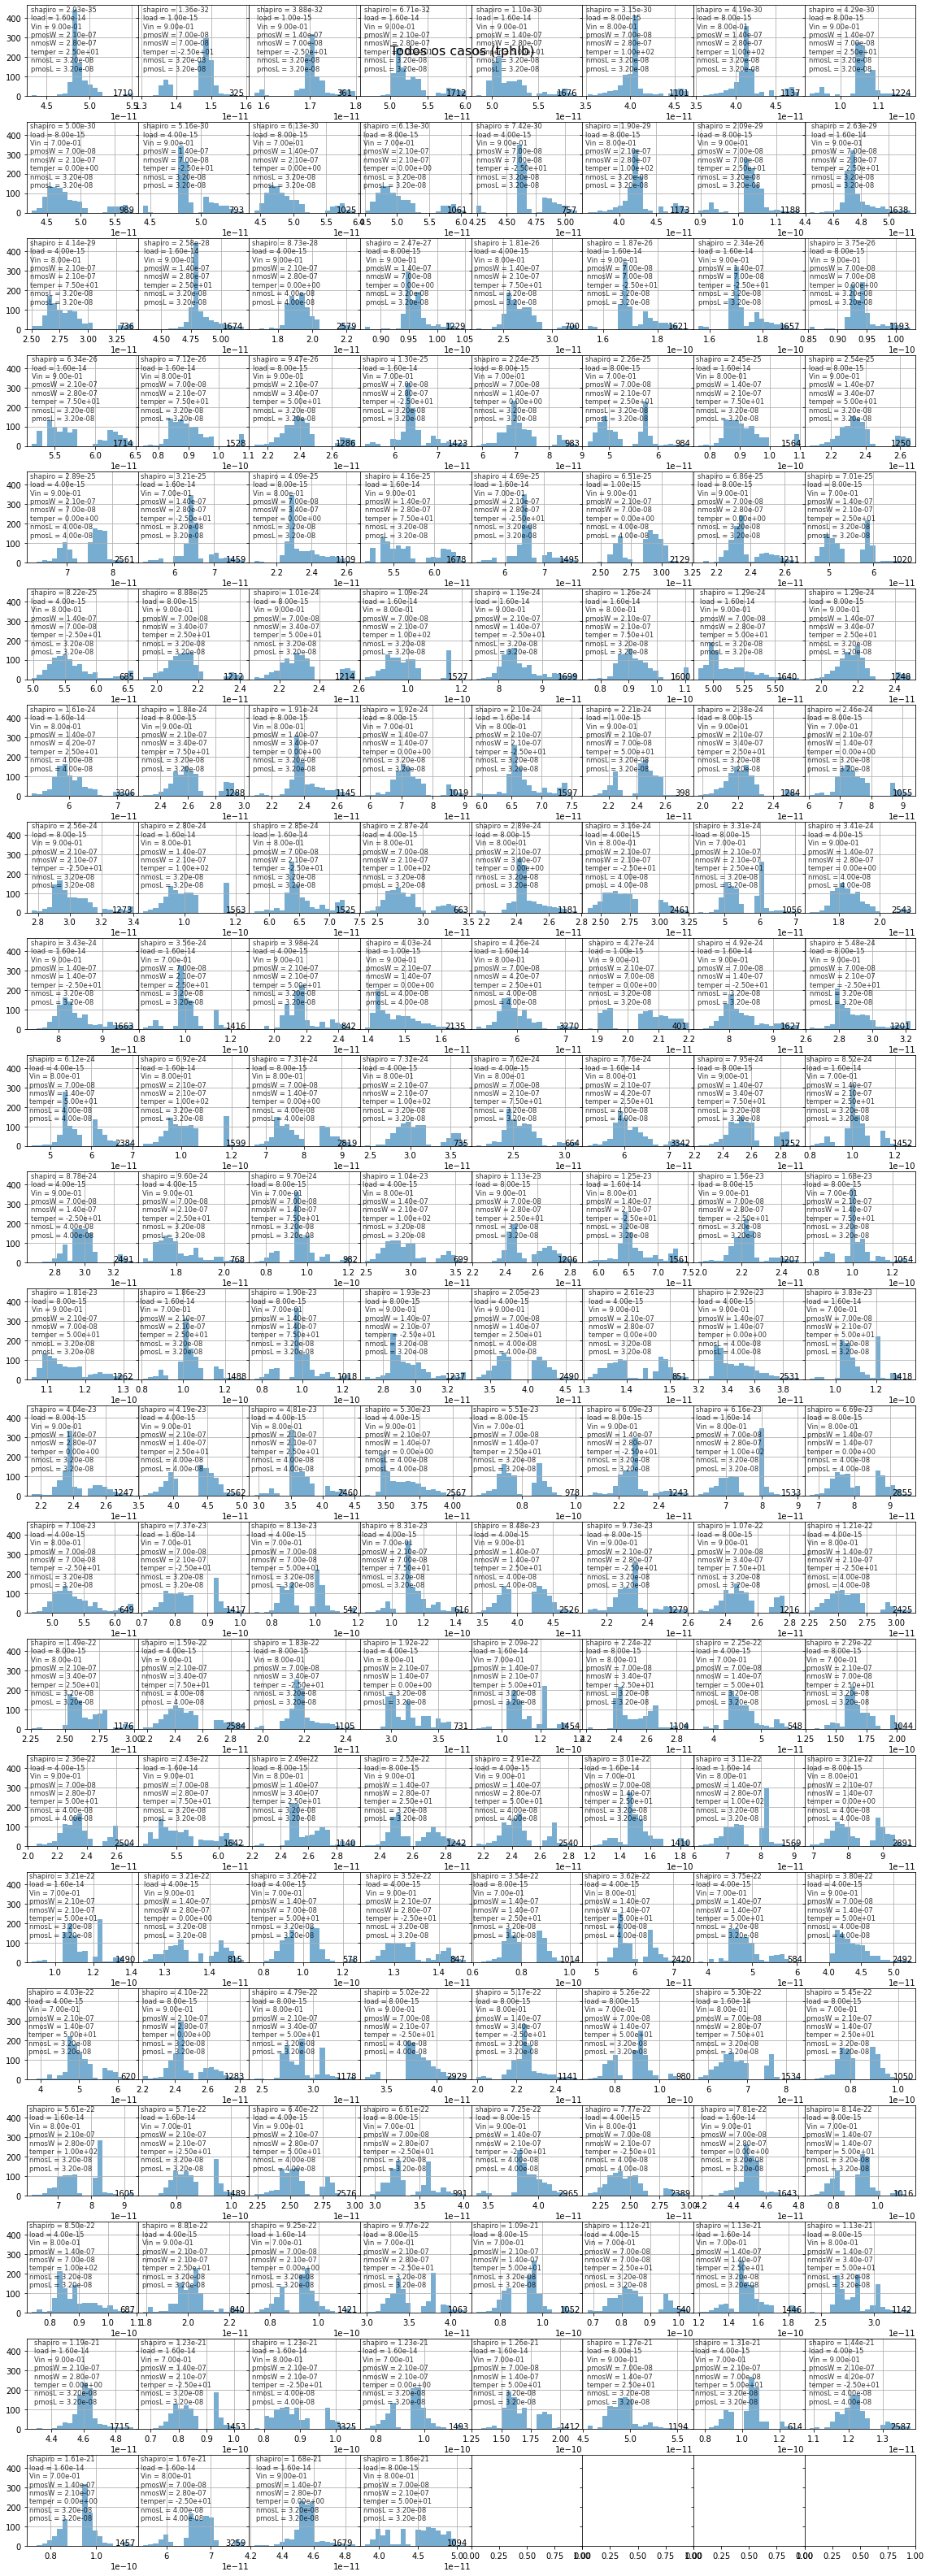

In [ ]:
plot_hist(filtered, "tphlb", inp_var, print_worst=0.05)

####TPLHA

365 of 3456 gaussian samples


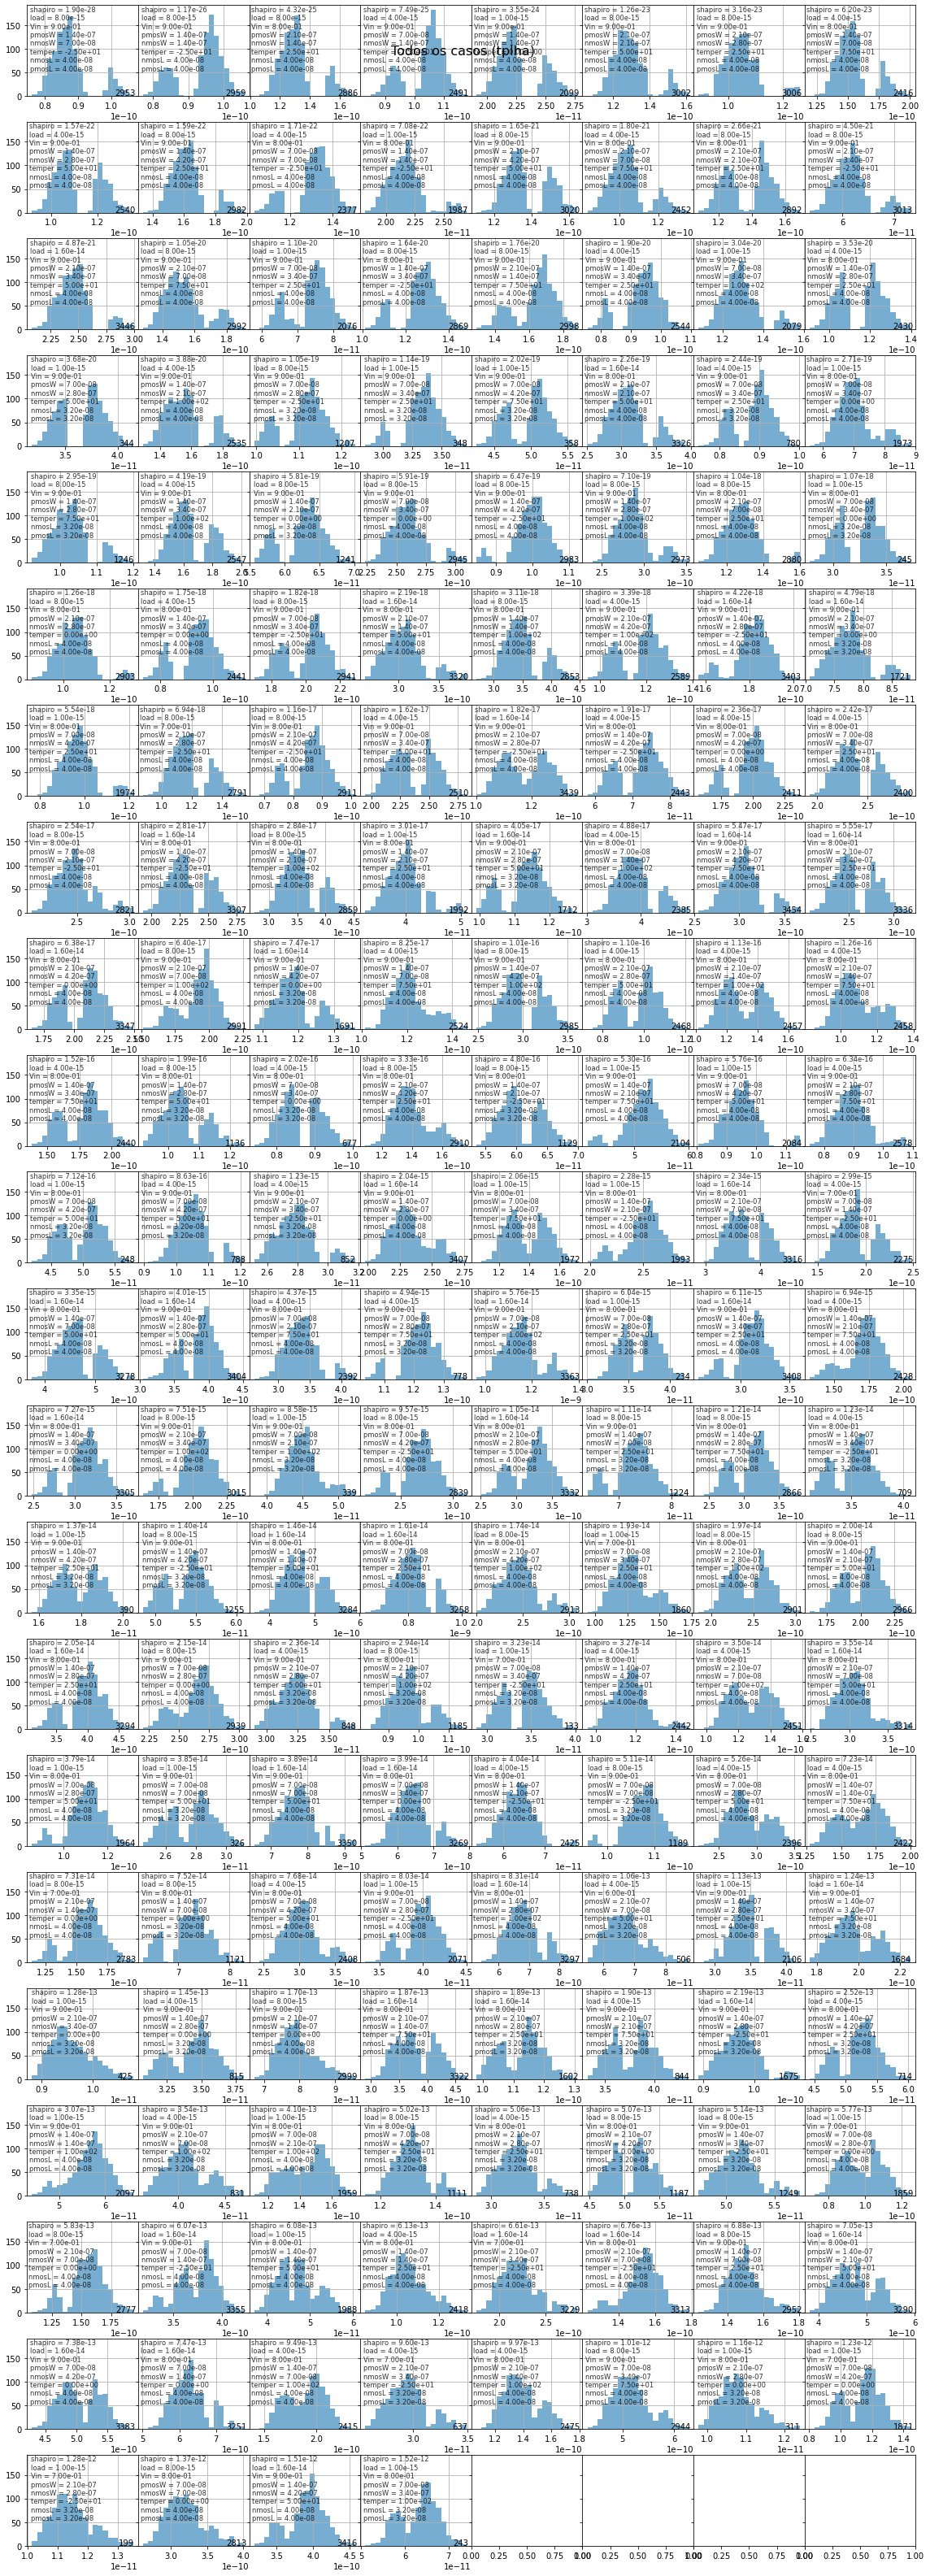

In [ ]:
plot_hist(filtered, "tplha", inp_var, print_worst=0.05)

####TPLHB

343 of 3456 gaussian samples


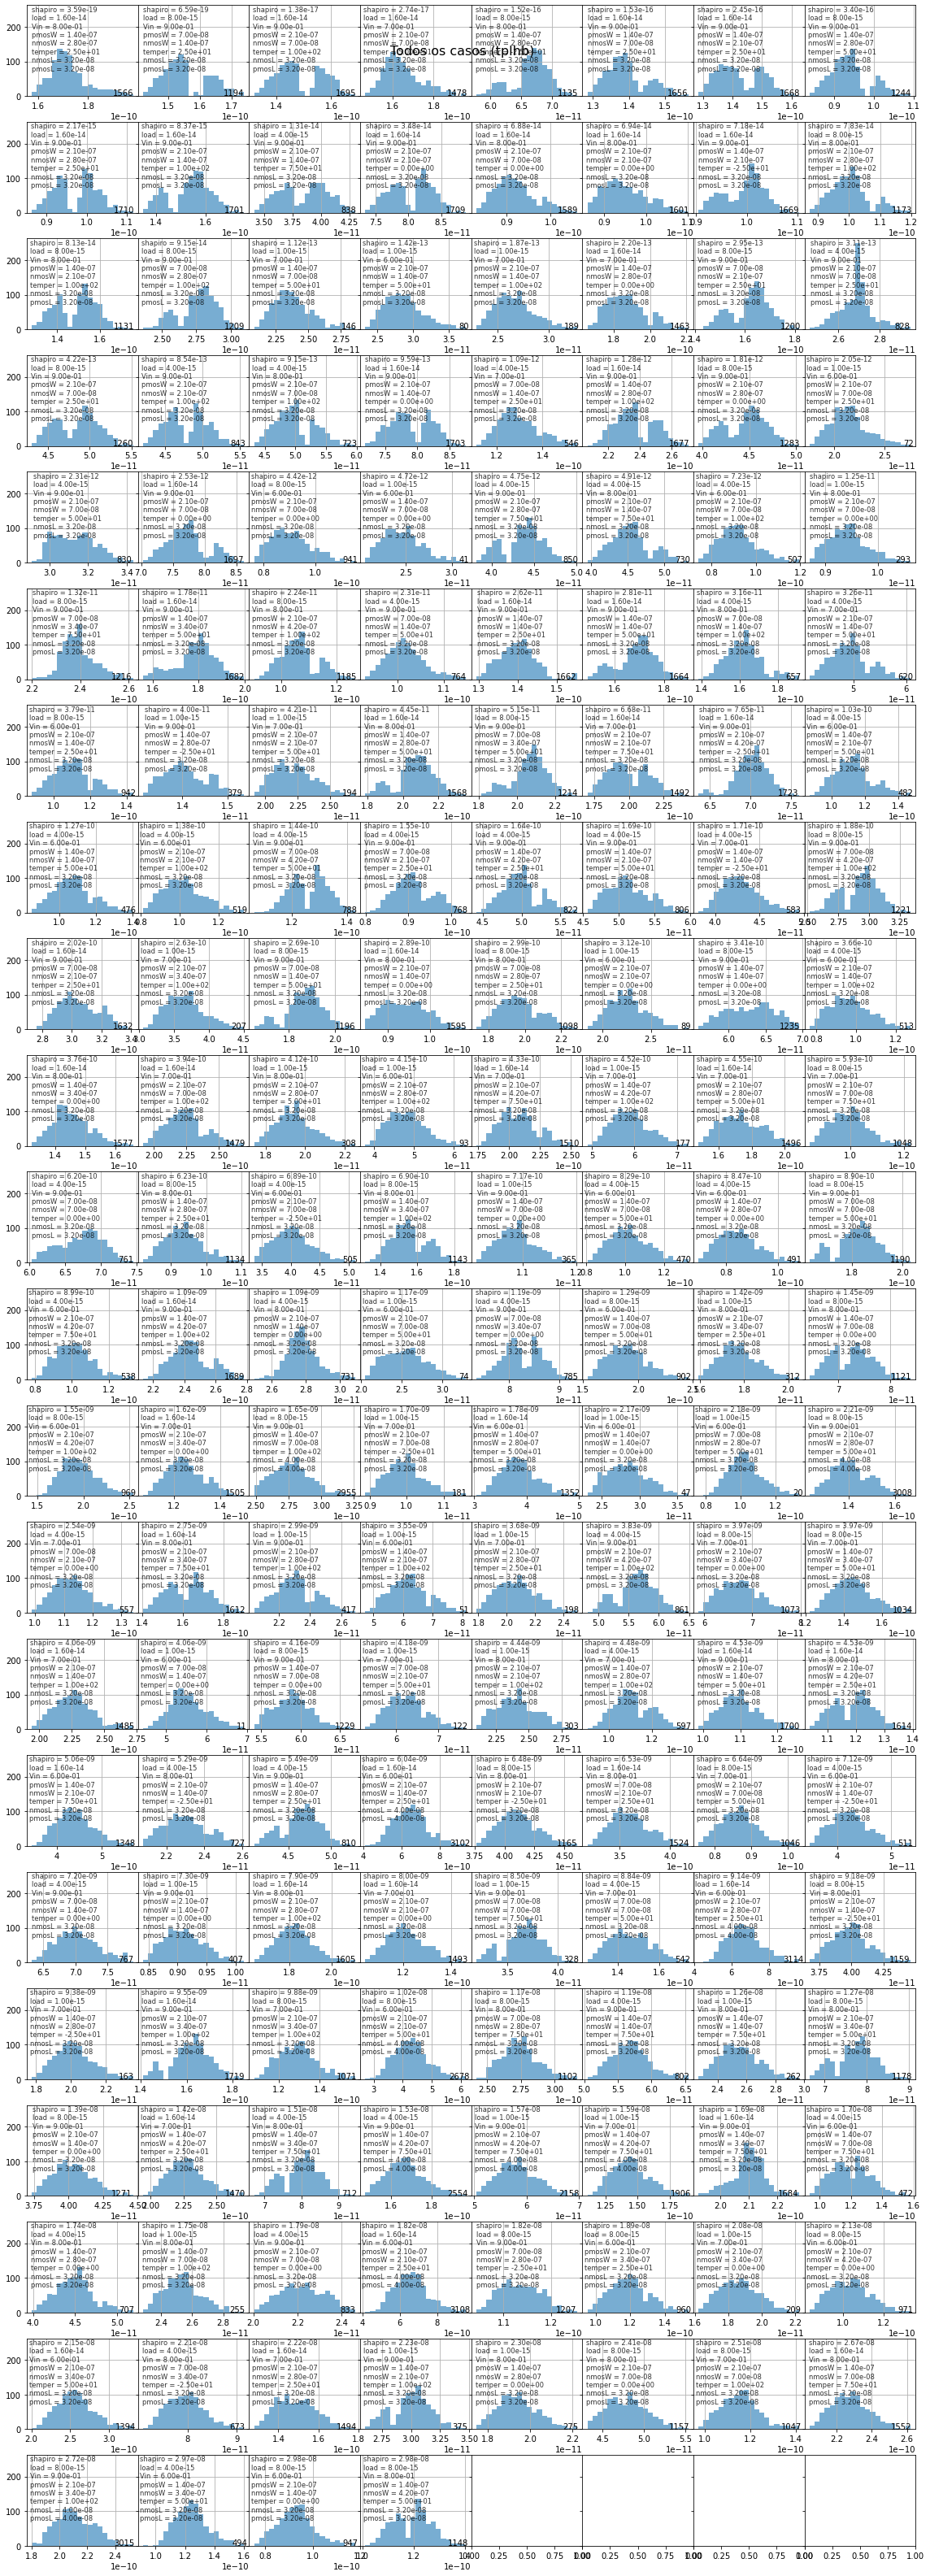

In [ ]:
plot_hist(filtered, "tplhb", inp_var, print_worst=0.05)

####IINT

36 of 3456 gaussian samples


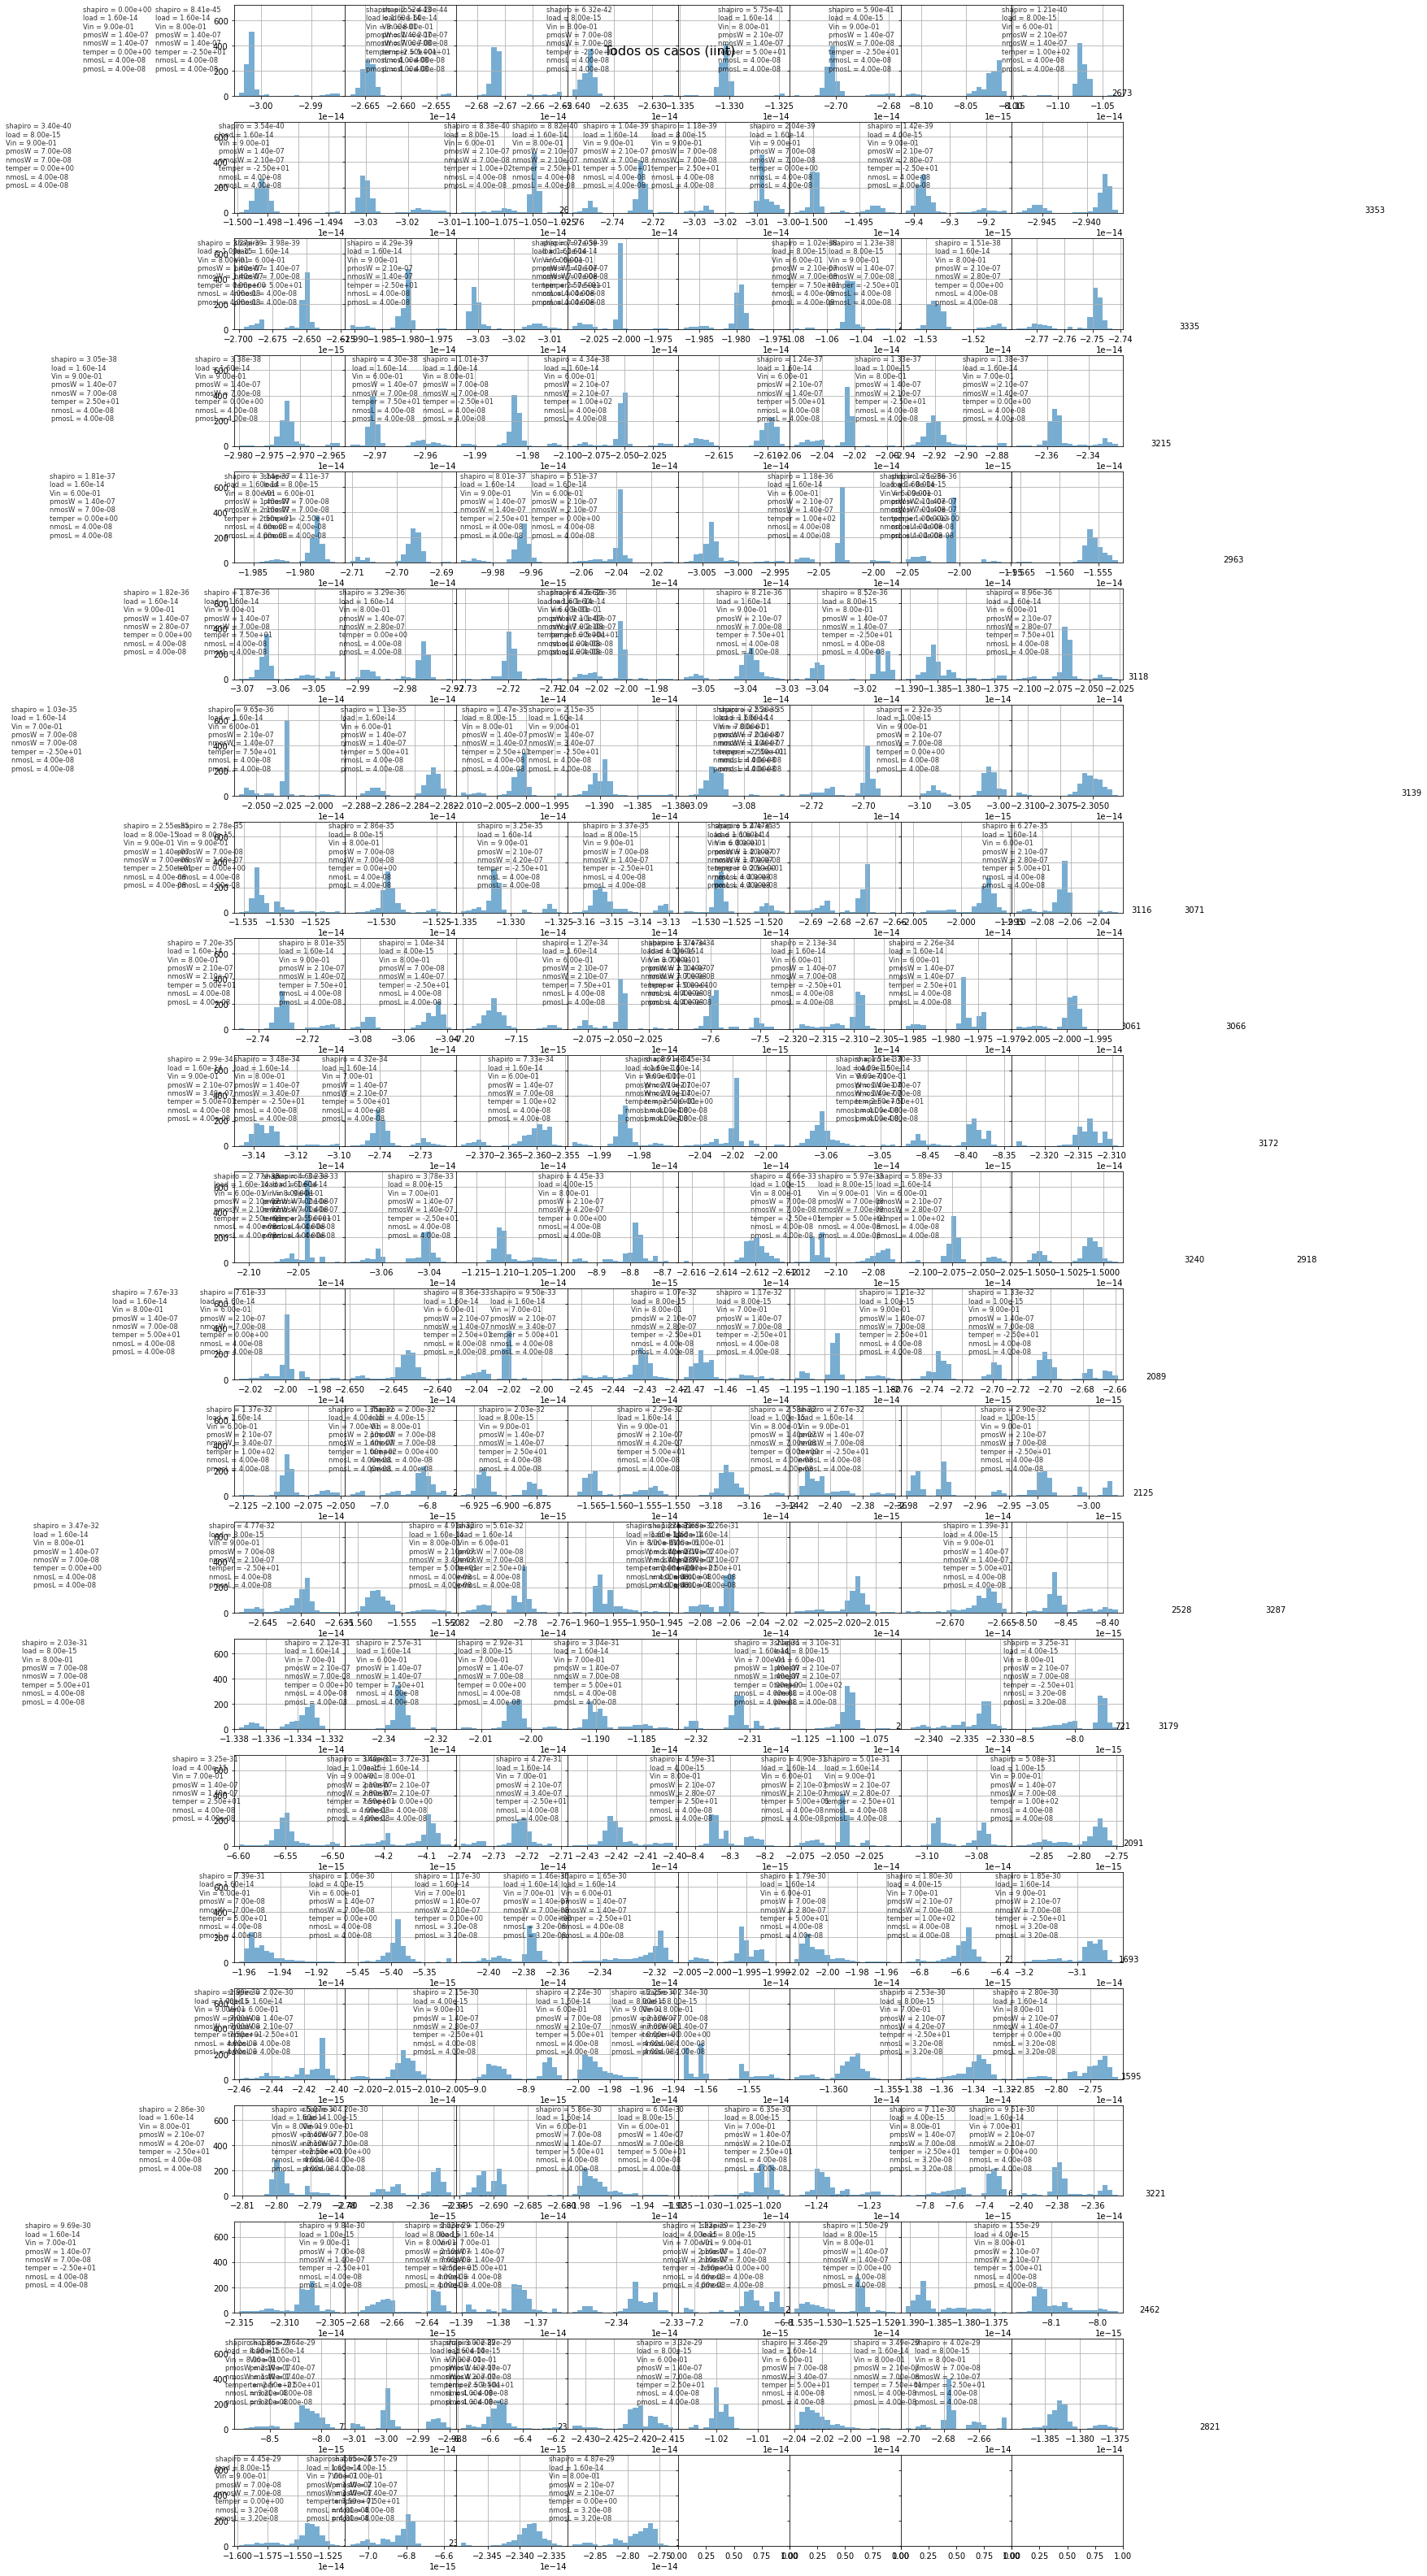

In [ ]:
plot_hist(filtered, "iint", inp_var, print_worst=0.05)

###Estudo de um dos casos com distribuição bimodal

Alguns casos apresentaram uma distribuição bimodal na distribuição de frequência das saídas.

In [15]:
caso = (1213, "tphla")
filtered.loc[caso[0]].describe()

nmos:@:var:@:IGNC  pmos:@:varp:@:IGNC          load           Vin  \
count         955.000000          955.000000  9.550000e+02  9.550000e+02   
mean           -0.026552            0.040983  8.000000e-15  9.000000e-01   
std             0.895374            0.958099  6.314194e-30  1.477370e-14   
min            -2.748800           -2.777600  8.000000e-15  9.000000e-01   
25%            -0.668450           -0.606750  8.000000e-15  9.000000e-01   
50%            -0.055750            0.105800  8.000000e-15  9.000000e-01   
75%             0.614850            0.680800  8.000000e-15  9.000000e-01   
max             2.062900            2.813700  8.000000e-15  9.000000e-01   

              pmosW         nmosW         tplha         tphla         tplhb  \
count  9.550000e+02  9.550000e+02  9.550000e+02  9.550000e+02  9.550000e+02   
mean   7.000000e-08  3.400000e-07  1.078666e-10  1.785362e-11  1.156916e-10   
std    5.296730e-22  8.262898e-21  2.900107e-12  6.312081e-13  3.560251e-12   
min    7.000000e-08  3.400000e-07  9.993267e-11  1.630062e-11  1.069695e-10   
25%    7.000000e-08  3.400000e-07  1.058491e-10  1.735286e-11  1.131844e-10   
50%    7.000000e-08  3.400000e-07  1.079470e-10  1.809369e-11  1.156080e-10   
75%    7.000000e-08  3.400000e-07  1.097541e-10  1.830790e-11  1.180000e-10   
max    7.000000e-08  3.400000e-07  1.166395e-10  1.881935e-11  1.270886e-10   

              tphlb          iint  temper         nmosL         pmosL  
count  9.550000e+02  9.550000e+02   955.0  9.550000e+02  9.550000e+02  
mean   1.864470e-11 -1.667848e-14   -25.0  3.200000e-08  3.200000e-08  
std    5.038587e-13  1.853111e-16     0.0  3.376665e-22  3.376665e-22  
min    1.710447e-11 -1.727676e-14   -25.0  3.200000e-08  3.200000e-08  
25%    1.834199e-11 -1.679066e-14   -25.0  3.200000e-08  3.200000e-08  
50%    1.860236e-11 -1.664572e-14   -25.0  3.200000e-08  3.200000e-08  
75%    1.896199e-11 -1.654479e-14   -25.0  3.200000e-08  3.200000e-08  
max    1.994516e-11 -1.626100e-14   -25.0  3.200000e-08  3.200000e-08

Segundo os dados, todas as amostras desse caso foram feitas utilizando os mesmos valores de entrada (temper, voltage, length, width_pmos, width_nmos), ou seja, aparetemente não houve erro na classificação de casos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


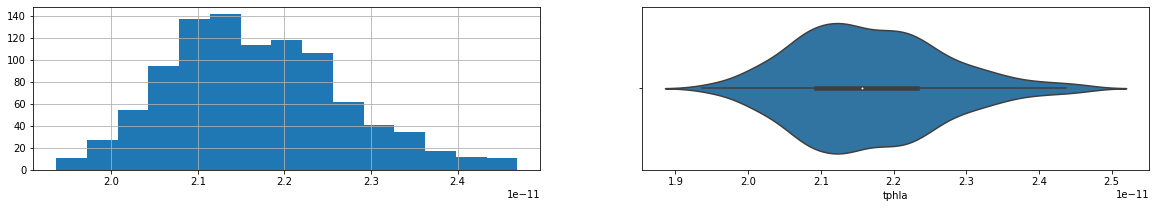

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 3))
filtered.loc[caso[0]][caso[1]].hist(ax=axs[0], bins=15)
sns.violinplot(filtered.loc[caso[0]][caso[1]], ax=axs[1])
plt.show()

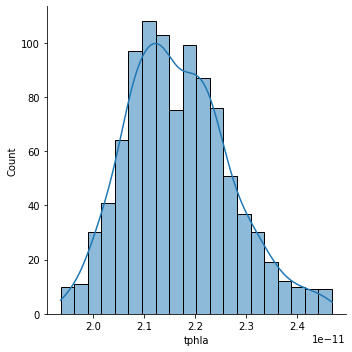

In [13]:
import seaborn as sns
sns.displot(filtered.loc[caso[0]][caso[1]], kde=True)

O histograma com mais *bins* revela que a distribuição de frequência parece muito com uma distribuição normal, mas com uma "região" faltando.

Para ver se isso tem alguma relação com as variações feitas durante a simulação de Monte Carlo, foi plotado o gráfico "3D" das projeções dos dados em cada plano.

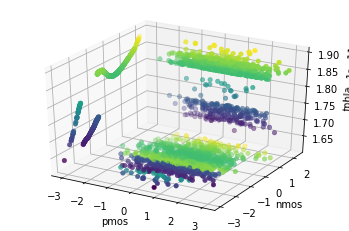

In [16]:
ax = plt.figure().add_subplot(projection='3d')
def lim(x):
  min = np.min(x)
  max = np.max(x)
  interv = (max-min)*0.1
  return (min-interv, max+interv)

# Data for three-dimensional scattered points
Z = filtered.loc[caso[0]][caso[1]]
zlim = lim(Z)
X = filtered.loc[caso[0]]["pmos:@:varp:@:IGNC"]
xlim = lim(X)
Y = filtered.loc[caso[0]]["nmos:@:var:@:IGNC"]
ylim = lim(Y)
#ax.scatter3D(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5, alpha=0.2)
ax.scatter(X, Y, zdir='z', linewidth=0.5, zs=zlim[0], c=Z, cmap='viridis')
ax.scatter(X, Z, zdir='y', linewidth=0.5, zs=ylim[1], c=Z, cmap='viridis')
ax.scatter(Y, Z, zdir='x', linewidth=0.5, zs=xlim[0], c=Z, cmap='viridis')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)

ax.set_xlabel("pmos")
ax.set_ylabel("nmos")
ax.set_zlabel(caso[1]);

Pelas projeções dos dados podemos ver que o tempo de descida depende exclusivamente da variação do nmos, como esperado. A relação entre a variação do nmos e o delay parece ser linear, com exeção da "quebra" próxima do valor 0,52.

In [ ]:
tmp = filtered.loc[caso[0]].sort_values(caso[1])
idxmax = tmp.diff()[caso[1]].iloc[:-10].argmax()
idxmax
tmp.iloc[idxmax-3:idxmax+3]

nmos:@:var:@:IGNC  pmos:@:varp:@:IGNC          load  Vin         pmosW  \
idx                                                                           
79             -1.6404              1.3187  8.000000e-15  0.9  7.000000e-08   
910            -1.6621             -0.2064  8.000000e-15  0.9  7.000000e-08   
640            -1.6488             -0.5417  8.000000e-15  0.9  7.000000e-08   
211             0.3894              1.6697  8.000000e-15  0.9  7.000000e-08   
831             0.3482              1.9667  8.000000e-15  0.9  7.000000e-08   
971             0.3958              1.0391  8.000000e-15  0.9  7.000000e-08   

            nmosW         tplha         tphla         tplhb         tphlb  \
idx                                                                         
79   3.400000e-07  1.120043e-10  1.772426e-11  1.229207e-10  1.772465e-11   
910  3.400000e-07  1.072475e-10  1.772430e-11  1.170338e-10  1.771110e-11   
640  3.400000e-07  1.062569e-10  1.773112e-11  1.131668e-10  1.771905e-11   
211  3.400000e-07  1.129079e-10  1.804198e-11  1.212196e-10  1.882997e-11   
831  3.400000e-07  1.139125e-10  1.804253e-11  1.224077e-10  1.880699e-11   
971  3.400000e-07  1.108453e-10  1.804280e-11  1.187739e-10  1.883394e-11   

             iint  temper         nmosL         pmosL  
idx                                                    
79  -1.681150e-14   -25.0  3.200000e-08  3.200000e-08  
910 -1.693600e-14   -25.0  3.200000e-08  3.200000e-08  
640 -1.701789e-14   -25.0  3.200000e-08  3.200000e-08  
211 -1.643141e-14   -25.0  3.200000e-08  3.200000e-08  
831 -1.641634e-14   -25.0  3.200000e-08  3.200000e-08  
971 -1.648057e-14   -25.0  3.200000e-08  3.200000e-08

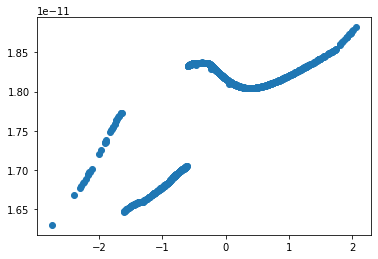

In [17]:
plt.scatter(Y, Z)

##Ainda não feito


###Entradas x Saídas

####Temperatura (temper)

In [ ]:
from statsmodels.graphics.boxplots import violinplot
from matplotlib import pyplot as plt

def plot_inp_out(dt, inp, out=["tphl", "tplh", "iint"]):
  fig, axs = plt.subplots(len(out), 1, figsize=(23, 20))
  for i in range(len(out)):
    pos = dt[inp].unique()
    pos.sort()
    dist = pos[1]-pos[0]

    grouped = data.groupby(inp)[out[i]]
    d = [gr1 for (_,gr1) in grouped]
    violinplot(data=d, ax=axs[i], positions=pos, show_boxplot=False,
               plot_opts={"violin_width":dist*0.8, "cutoff":False})
    axs[i].plot(grouped.mean(), "-")
    axs[i].set_xlim([pos[0]-dist/2, pos[-1]+dist/2])
    axs[i].set_title("%s x %s" %(inp, out[i]))
    axs[i].grid(True)

#temper 	voltage 	length 	width_pmos 	width_nmos
plot_inp_out(data, "temper")

####Tensão (tensao)

In [ ]:
plot_inp_out(data, "voltage")

####Comprimento (length)

In [ ]:
plot_inp_out(data, "length")

####Largura PMOS (width_pmos)

In [ ]:
#temper 	voltage 	length 	width_pmos 	width_nmos
plot_inp_out(data, "width_pmos")

#### Largura NMOS (width_nmos)

In [ ]:
plot_inp_out(data, "width_nmos")

###Pearson e Spearman

###Violin Plot de cada caso (Simulação de Monte Carlo)

&ensp; Gráficos da distribuição de frequência de cada variável de saída em cada caso conjunto de amostras onde as variáveis de entrada tem o mesmo valor)

####TPHLA

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_hist(dt, col):
  n_rows = int(np.sqrt(n_cases))*2
  n_col = int(np.ceil(n_cases/n_rows))
  fig, axs = plt.subplots(n_rows, 1, figsize=(23, 200))
  for i in range(n_rows):
    index = range(i*n_col, min(n_cases, (i+1)*n_col))
    grouped = [dt[col].loc[i].values for i in index]
    sns.violinplot(data=grouped, ax=axs[i])
    axs[i].set_xticklabels(labels=index)
    axs[i].set_xlim([-0.5, n_col-0.5])

plot_hist(data, "tphla")

####TPHLB

####TPLH

In [ ]:
plot_hist(data, "tplh")

####IINT

In [ ]:
plot_hist(data, "iint")

In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 8))
pear = data[data.columns[2:]].corr().iloc[:3]
spear = data[data.columns[2:]].corr(method='spearman').iloc[:3]

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

sns.heatmap(pear, center=0, annot=True, fmt='.2f', square=True, 
            cmap=cmap, cbar=False, ax=axs[0])
sns.heatmap(spear, center=0, annot=True, fmt='.2f', square=True, 
            cmap=cmap, cbar=False, ax=axs[1])
axs[0].set_title("Pearson (linear)")
axs[1].set_title("Spearman (monotonic)")
plt.show();